# 🔥 load Dataset

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [4]:
df = pd.read_csv("../data/phish.csv")


In [5]:
df

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,http://www.fontspace.com/category/blackletter,45,17,0,2,0,0,0,0,0,...,0,0,0,448,5396,3980,0,0,6,legitimate
11426,http://www.budgetbots.com/server.php/Server%20...,84,18,0,5,0,1,1,0,0,...,1,0,0,211,6728,0,0,1,0,phishing
11427,https://www.facebook.com/Interactive-Televisio...,105,16,1,2,6,0,1,0,0,...,0,0,0,2809,8515,8,0,1,10,legitimate
11428,http://www.mypublicdomainpictures.com/,38,30,0,2,0,0,0,0,0,...,1,0,0,85,2836,2455493,0,0,4,legitimate


In [6]:
df.head(20)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [7]:
df.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

In [8]:
df.shape

(11430, 89)

In [9]:
df[["url","nb_hyperlinks"]]

,url,nb_hyperlinks
0,http://www.crestonwood.com/router.php,17
1,http://shadetreetechnology.com/V4/validation/a...,30
2,https://support-appleld.com.secureupdate.duila...,4
3,http://rgipt.ac.in,149
4,http://www.iracing.com/tracks/gateway-motorspo...,102
...,...,...
11425,http://www.fontspace.com/category/blackletter,199
11426,http://www.budgetbots.com/server.php/Server%20...,3
11427,https://www.facebook.com/Interactive-Televisio...,68
11428,http://www.mypublicdomainpictures.com/,32


# 🔥Feature Extraction

In [10]:
html_features = [
 'nb_hyperlinks','ratio_intHyperlinks','ratio_extHyperlinks','ratio_nullHyperlinks',
 'nb_extCSS','ratio_intRedirection','ratio_extRedirection','ratio_intErrors','ratio_extErrors',
 'login_form','external_favicon','links_in_tags','submit_email','ratio_intMedia','ratio_extMedia',
 'sfh','iframe','popup_window','safe_anchor','onmouseover','right_clic','empty_title',
 'domain_in_title','domain_with_copyright'
]

In [11]:
external_features = [
 'whois_registered_domain','domain_registration_length','domain_age',
 'web_traffic','dns_record','google_index','page_rank'
]

In [12]:
drop_cols = ['url']  # we won't feed raw url to model
# Add known html + external cols if present
for c in html_features + external_features:
    if c in df.columns:
        drop_cols.append(c)

# Extra defensive drop: any clearly external columns
for col in list(df.columns):
    low = col.lower()
    if ('whois' in low or 'page_rank' in low or 'google_index' in low or 'web_traffic' in low):
        if col not in drop_cols:
            drop_cols.append(col)

print("Dropping", len(drop_cols), "columns (if present).")


Dropping 32 columns (if present).


In [13]:
df_work = df.copy()
for c in drop_cols:
    if c in df_work.columns:
        df_work = df_work.drop(columns=[c])

print("After drop shape:", df_work.shape)

After drop shape: (11430, 57)


In [14]:
# 4) Create numeric label column from 'status' (assumes values 'phishing'/'legitimate')
if 'status' in df_work.columns:
    df_work['label'] = df_work['status'].map(lambda x: 1 if str(x).strip().lower()=='phishing' else 0)
    df_work = df_work.drop(columns=['status'])
elif 'label' in df_work.columns:
    # if already numeric or string label
    try:
        df_work['label'] = df_work['label'].astype(int)
    except:
        df_work['label'] = df_work['label'].map(lambda x: 1 if str(x).strip().lower() in ['phishing','malicious','1','true'] else 0)
else:
    raise ValueError("No label column found. Expected 'status' or 'label'.")


In [ ]:
y = df_work['label']
X = df_work.drop(columns=['label'])
print("Feature matrix shape:", X.shape)

# 6) Convert any non-numeric columns to numeric where possible
for col in X.columns:
    if X[col].dtype == object:
        X[col] = pd.to_numeric(X[col], errors='coerce') # coerce means invalid parsing will be set as NaN

# 7) Quick missing info
missing_pct = X.isna().mean().sort_values(ascending=False) # fraction of missing values per column,, we  used this for imputation later
print("Top missing columns (pct):")
print(missing_pct[missing_pct>0].head(10))


Feature matrix shape: (11430, 56)
Top missing columns (pct):
Series([], dtype: float64)


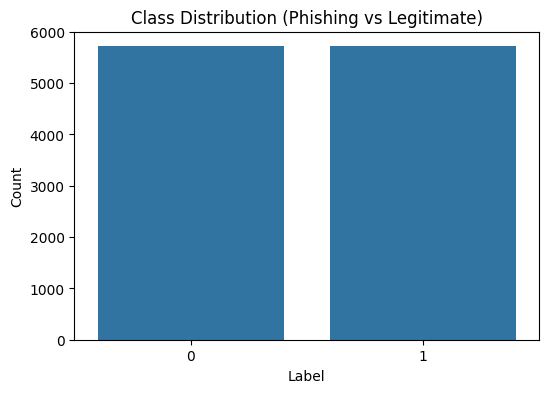

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Class Distribution (Phishing vs Legitimate)")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


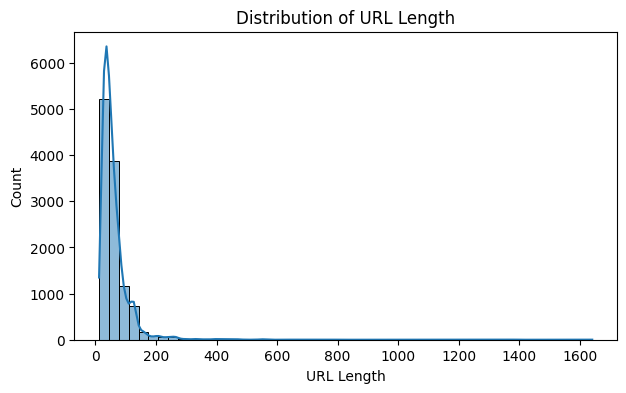

In [17]:
plt.figure(figsize=(7,4))
sns.histplot(df['length_url'], bins=50, kde=True) # bins means the number of bars in histogram
plt.title("Distribution of URL Length")
plt.xlabel("URL Length")
plt.ylabel("Count")
plt.show()


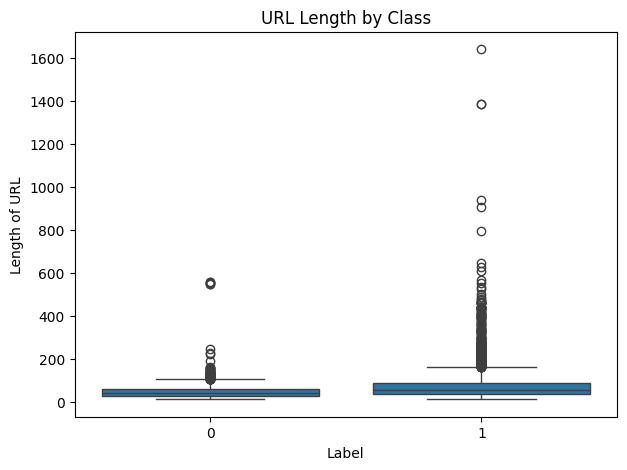

In [18]:
plt.figure(figsize=(7,5))
sns.boxplot(x=y, y=df['length_url'])
plt.title("URL Length by Class")
plt.xlabel("Label")
plt.ylabel("Length of URL")
plt.show()


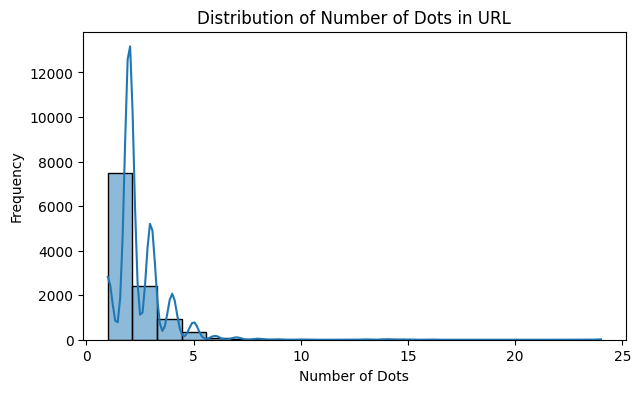

In [19]:
plt.figure(figsize=(7,4))
sns.histplot(df['nb_dots'], bins=20, kde=True)
plt.title("Distribution of Number of Dots in URL")
plt.xlabel("Number of Dots")
plt.ylabel("Frequency")
plt.show()


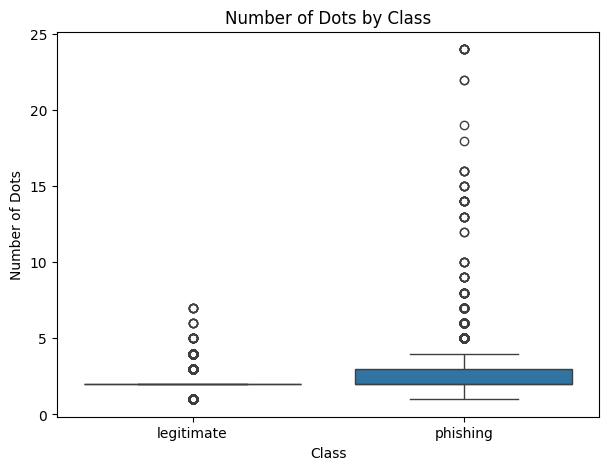

In [20]:
plt.figure(figsize=(7,5))
sns.boxplot(x=df['status'], y=df['nb_dots'])
plt.title("Number of Dots by Class")
plt.xlabel("Class")
plt.ylabel("Number of Dots")
plt.show()


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
print("Train/test shapes:", X_train.shape, X_test.shape)

# 9) Simple pipeline: imputer -> scaler -> XGBoost
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # median because bahut sara ouliers ha yar
    ('scaler', StandardScaler()), #standcaler means mean=0 and std=1, and here we want to preserve outliers so we use standardscaler
    ('xgb', XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss', # logloss because binary classification problem
        use_label_encoder=False, #Now unnecessary → set this to False to avoid warnings.
        n_estimators=200, # bhai 200 boosted trees, and each mistake pe wo apna aap ko sudharta hai
        max_depth=6, # each tree will go 6 levels deep
        learning_rate=0.05, # Each tree contributes only 5% of its prediction strength. slower learning but better stability in learning, which prevents overfitting
        subsample=0.8, #XGBoost uses 80% of training rows randomly for each tree. which provides randomness and prevents overfitting
        colsample_bytree=0.8, #XGBoost uses 80% of features randomly for each tree. which provides randomness and prevents overfitting
        random_state=42, # Ensures reproducibility — same model every time.
        n_jobs=-1  # Uses all CPU cores for maximum speed.
    ))
])

Train/test shapes: (9144, 56) (2286, 56)


Although the dataset contains many outliers (very long URLs, many dots, abnormal subdomains), these are not erroneous values — they are genuine characteristics of phishing attempts.
Outliers were intentionally preserved because:

XGBoost handles them naturally using split-based learning

They provide strong predictive signals

Scaling inside our Pipeline ensures numerical stability
This leads to a robust model with high real-world accuracy.

In [22]:

# 10) Fit model
print("Training model (this may take a minute)...")
pipeline.fit(X_train, y_train) # fit means train the model on training data, it will go through all the steps in pipeline sequentially on training data

# 11) Evaluate
y_pred = pipeline.predict(X_test) # predict means use the trained model to make predictions on test data
y_proba = pipeline.predict_proba(X_test)[:,1] # predict_proba gives probabilities for each class, [:,1] means probability of positive class

Training model (this may take a minute)...


c:\Users\sachi\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [15:11:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [23]:

print("Accuracy:", round(accuracy_score(y_test, y_pred),4)) # 
print("ROC-AUC:", round(roc_auc_score(y_test, y_proba),4))
print("Classification report:\n", classification_report(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9138
ROC-AUC: 0.9721
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      1143
           1       0.91      0.92      0.91      1143

    accuracy                           0.91      2286
   macro avg       0.91      0.91      0.91      2286
weighted avg       0.91      0.91      0.91      2286

Confusion matrix:
 [[1038  105]
 [  92 1051]]


In [24]:
# 12) Feature importances from XGBoost (extract underlying model)
feature_names = X.columns.tolist()
xgb_model = pipeline.named_steps['xgb']
importances = xgb_model.feature_importances_
fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("Top 20 feature importances:\n", fi.head(20))


Top 20 feature importances:
 nb_www                0.221226
phish_hints           0.105098
ratio_digits_host     0.041561
domain_in_brand       0.039339
longest_word_path     0.037442
nb_dots               0.035167
nb_qm                 0.035007
length_words_raw      0.030381
nb_hyphens            0.024223
suspecious_tld        0.023152
shortening_service    0.022857
nb_eq                 0.020549
nb_subdomains         0.019204
longest_words_raw     0.019056
nb_underscore         0.017904
ratio_digits_url      0.017484
statistical_report    0.016662
ip                    0.015952
length_hostname       0.015438
https_token           0.015330
dtype: float32


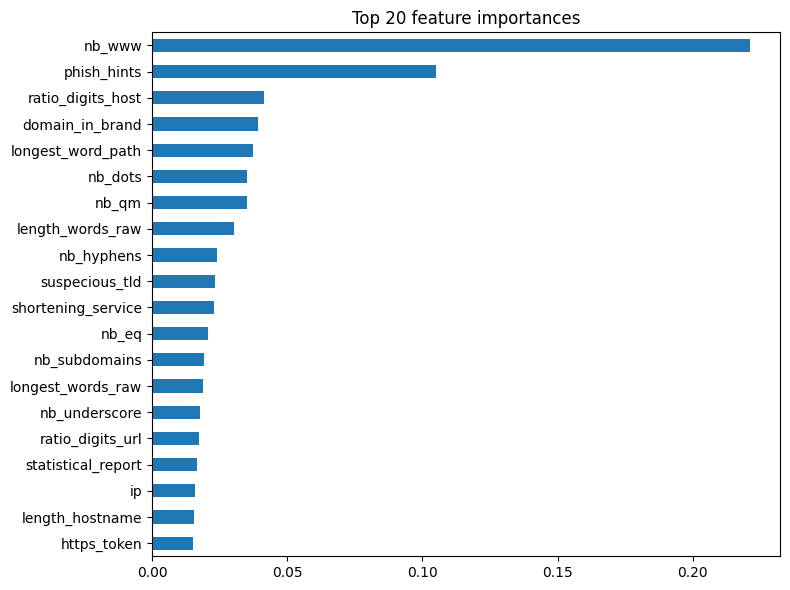

Saved model to xgb_phish_model.joblib
Saved cleaned CSV to phish_cleaned.csv


In [25]:
plt.figure(figsize=(8,6))
fi.head(20).sort_values().plot(kind='barh')
plt.title("Top 20 feature importances")
plt.tight_layout()
plt.show()

# 13) Save model and cleaned CSV (if you want)
joblib.dump(pipeline, "../models/xgb_phish_model.joblib")
print("Saved model to xgb_phish_model.joblib")
cleaned = X.copy()
cleaned['label'] = y.values
cleaned.to_csv("../data/phish_cleaned.csv", index=False)
print("Saved cleaned CSV to phish_cleaned.csv")

In [26]:
print(X.columns.tolist())

['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore', 'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma', 'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com', 'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url', 'ratio_digits_host', 'punycode', 'port', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains', 'prefix_suffix', 'random_domain', 'shortening_service', 'path_extension', 'nb_redirection', 'nb_external_redirection', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand', 'brand_in_subdomain', 'brand_in_path', 'suspecious_tld', 'statistical_report']
